<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Python_DataAnalysis/%EC%A4%91%EA%B3%A0%EC%B0%A8%EA%B0%80%EA%B2%A9_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.listdir('drive/My')

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fastcampus/MachineLearning_300/Part 2 - 머신러닝 회귀 모델/Chapter 1 - 자동으로 모은 데이터는 분석하기 어렵다면서_ 자동으로 모은 중고 자동차 데이터를 분석해보자!/vehicles.csv')
df.shape

(458213, 26)

In [ ]:
df.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.isna().sum()

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
# 불필요한 컬럼제거하기
# 'year' 컬럼을 'age' 컬럼으로 변경하기

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.drop([
        'Unnamed: 0', 'id', 'url', 'region_url', 
       'VIN', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date' 
], axis = 1, inplace = True)

In [ ]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [ ]:
 df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,16.0


### 범주형 데이터 통계분석하기

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
# 범주형 데이터 값의 범위 및 기초 통계분석

# 총 제조사는 몇개냐 ??
len(df['manufacturer'].value_counts())

43

In [ ]:
df['manufacturer'].value_counts()

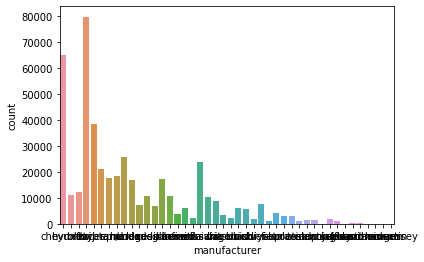

In [ ]:
# 분포는 countplot을 이용하자

sns.countplot(x = 'manufacturer', data=df.fillna('n/a'))

# order가 없으면 난잡함 어떤게 많은지 분간이안됨

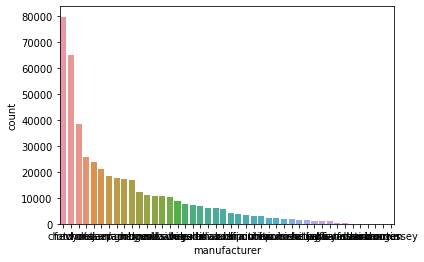

In [ ]:
sns.countplot(x = 'manufacturer', data=df.fillna('n/a'), order= df.fillna('n/a')['manufacturer'].value_counts().index)

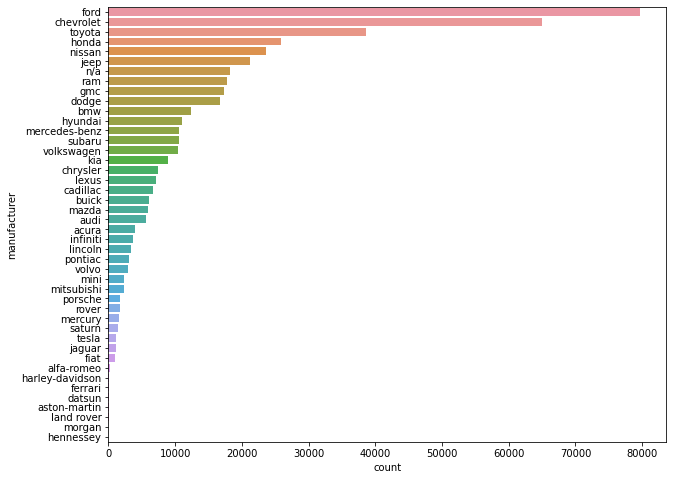

In [ ]:
# 어우 너무 많다 y축으로 바꾸자
plt.figure(figsize=(10,8))
sns.countplot(y = 'manufacturer', data=df.fillna('n/a'), order= df.fillna('n/a')['manufacturer'].value_counts().index)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
# 모델의 수를 파악해보자
len(df['model'].value_counts())

# 어마어마하게 많구만

31520

In [ ]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()) :
  print(model, num)

In [ ]:
plt.figure(figsize=(10,8))
#sns.countplot(y = 'model', data=df.fillna('n/a'), order= df.fillna('n/a')['model'].value_counts().index)

# 얘는 메모리문제로 볼수가엄서용

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

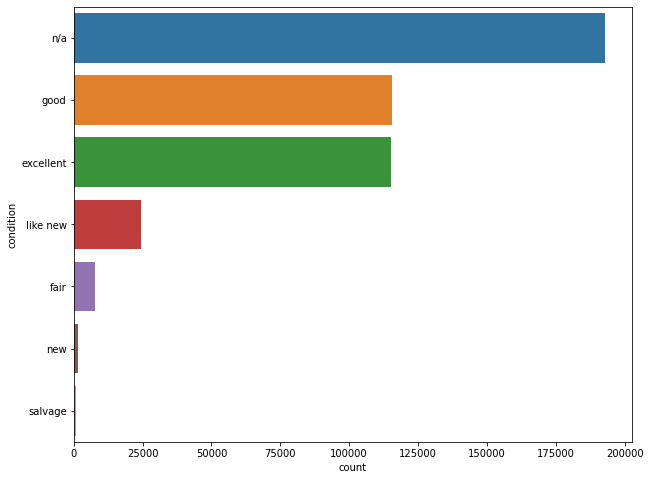

In [ ]:
# 컨디션을 볼까

plt.figure(figsize=(10,8))
sns.countplot(y = 'condition' , data=df.fillna('n/a'), order= df.fillna('n/a')['condition'].value_counts().index)

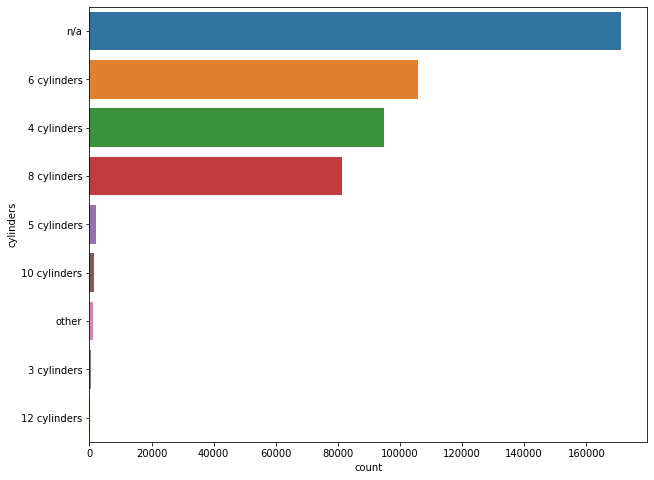

In [ ]:
# 이번엔 실린더

plt.figure(figsize=(10,8))
sns.countplot(y = 'cylinders' , data=df.fillna('n/a'), order= df.fillna('n/a')['cylinders'].value_counts().index)

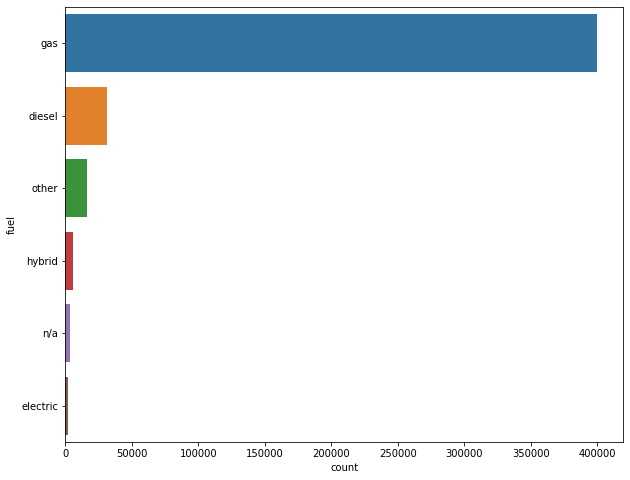

In [ ]:
# 이번엔 연료
plt.figure(figsize=(10,8))
sns.countplot(y = 'fuel' , data=df.fillna('n/a'), order= df.fillna('n/a')['fuel'].value_counts().index)


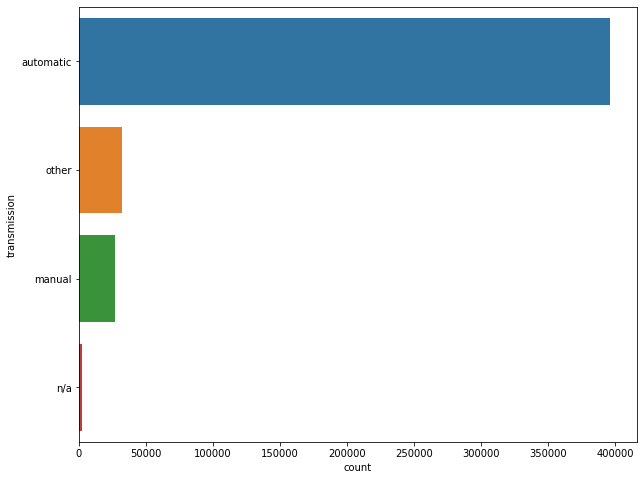

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'transmission' , data=df.fillna('n/a'), order= df.fillna('n/a')['transmission'].value_counts().index)

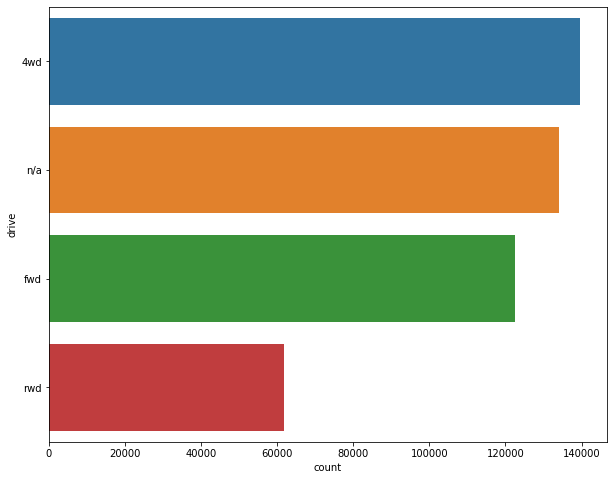

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'drive' , data=df.fillna('n/a'), order= df.fillna('n/a')['drive'].value_counts().index)

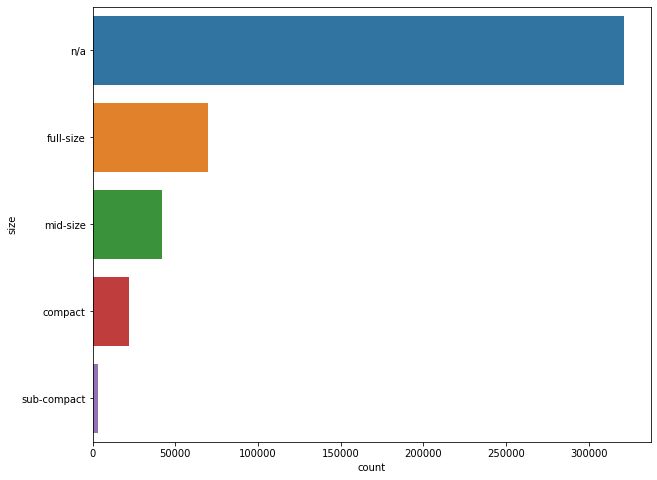

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'size' , data=df.fillna('n/a'), order= df.fillna('n/a')['size'].value_counts().index)

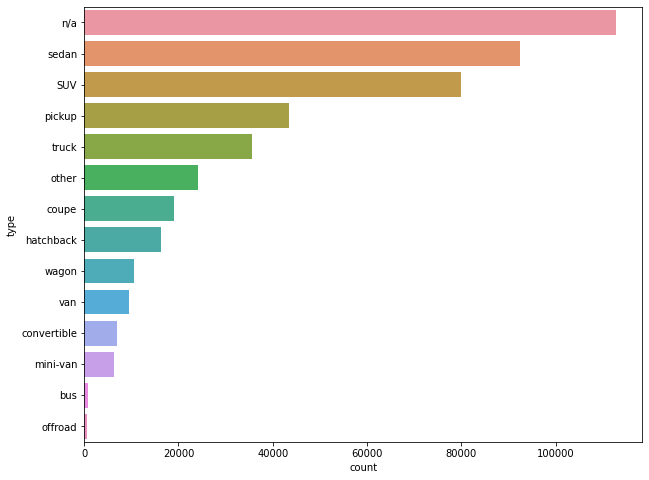

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'type' , data=df.fillna('n/a'), order= df.fillna('n/a')['type'].value_counts().index)

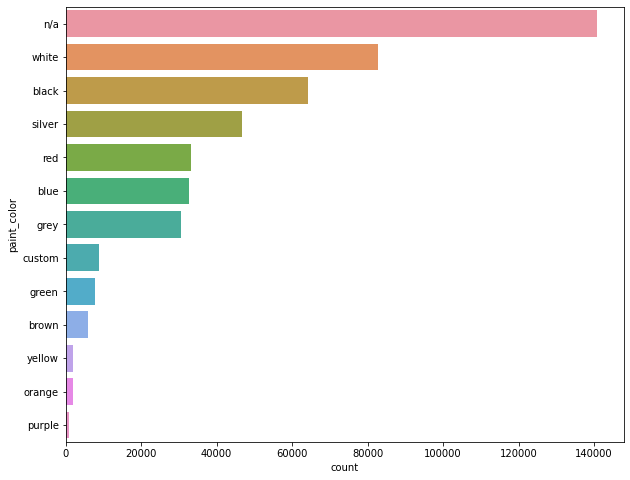

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y = 'paint_color' , data=df.fillna('n/a'), order= df.fillna('n/a')['paint_color'].value_counts().index)

### 수치형 데이터의 통계 분석하기

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

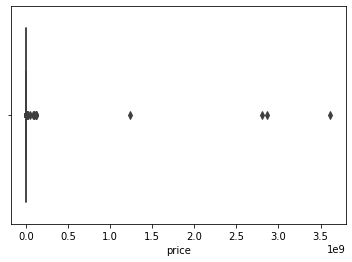

In [ ]:
#sns.histplot(x = 'price', data=df)
# 가격같은건 히스토그램으로 보려고하면 메모리 에러걸림

# 그래서 박스플랏을 이용하자

sns.boxplot(x='price', data=df)

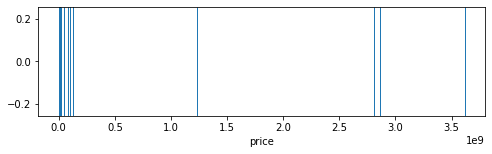

In [ ]:
# 그래도 뭐 보이는게 없다 rug plot으로 봐보자

plt.figure(figsize=(8,2))
sns.rugplot(x = 'price', data= df, height= 1)

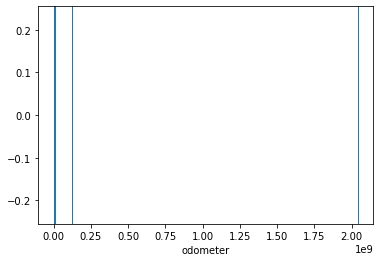

In [ ]:
# 얘도 아까 이상치가 하나 있었던걸로 보이기 때문에 rugplot을 실시한다
sns.rugplot(x = 'odometer', data=df, height = 1)

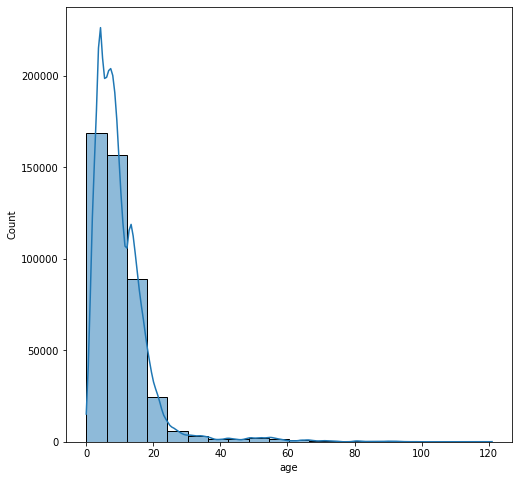

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(x = 'age', data=df, bins = 20, kde = True)

In [ ]:
# 수치를 알기가 굉장히 힘들군 .... 데이터가 더러워

### 데이터 클리닝 수행하기

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

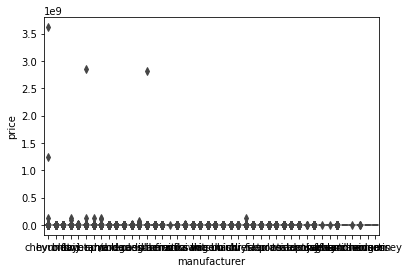

In [ ]:
# 범주형 데이터 시각화하여 분석하기
sns.boxplot(x = 'manufacturer', y = 'price', data=df.fillna('n/a'))

#알아볼수가없음... 

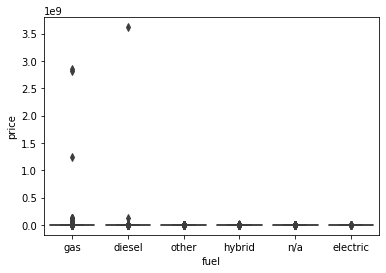

In [ ]:
sns.boxplot(x = 'fuel', y = 'price', data=df.fillna('n/a'))

# 이상치 때문에 분석하기가 힘듦

In [ ]:
# 범주형 데이터 클리닝하기

# 1. 결손데이터가 포함된 row 제거
# 2. 결손데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정해서 채워넣기)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
df['manufacturer'].fillna('others').value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
others             18220
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63


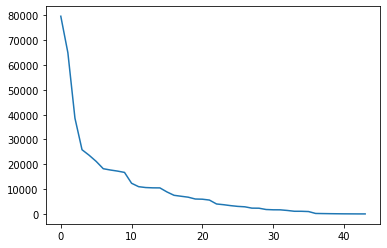

In [ ]:
# 시스템화 시켜버리자

col = 'manufacturer'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)

In [ ]:
# 이제 딱 보고 몇번째 이후부터는 others로 대체하는 작업을 실시하자

In [ ]:
# 범주형 데이터를 몇개로 할 것인지 정해보자 여기서는 10개로 하자
n_categorical = 10
counts.index # 참고로 이것은 내림차순으로 나와 있는 것임

Index(['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep', 'others',
       'ram', 'gmc', 'dodge', 'bmw', 'hyundai', 'mercedes-benz', 'subaru',
       'volkswagen', 'kia', 'chrysler', 'lexus', 'cadillac', 'buick', 'mazda',
       'audi', 'acura', 'infiniti', 'lincoln', 'pontiac', 'volvo', 'mini',
       'mitsubishi', 'porsche', 'rover', 'mercury', 'saturn', 'tesla',
       'jaguar', 'fiat', 'alfa-romeo', 'harley-davidson', 'ferrari', 'datsun',
       'aston-martin', 'land rover', 'morgan', 'hennessey'],
      dtype='object')

In [ ]:
counts.index[10:] #여기에 속해있으면 others로 바꿔주고 아니면 가만히 있게끔 하자

Index(['bmw', 'hyundai', 'mercedes-benz', 'subaru', 'volkswagen', 'kia',
       'chrysler', 'lexus', 'cadillac', 'buick', 'mazda', 'audi', 'acura',
       'infiniti', 'lincoln', 'pontiac', 'volvo', 'mini', 'mitsubishi',
       'porsche', 'rover', 'mercury', 'saturn', 'tesla', 'jaguar', 'fiat',
       'alfa-romeo', 'harley-davidson', 'ferrari', 'datsun', 'aston-martin',
       'land rover', 'morgan', 'hennessey'],
      dtype='object')

In [ ]:
 df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')

In [ ]:
df[col].value_counts()

others       134392
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

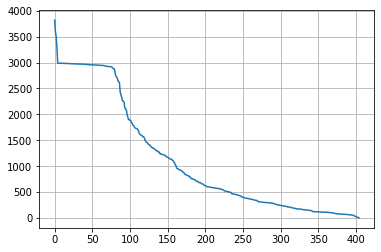

In [ ]:
# 이번에는 region을 보자

col = 'region'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

# 범주형 변수를 다(400개) 가져가기에는 부담스러움 그래서 5개만 가져가기로함

In [ ]:
# 범주형 데이터를 몇개로 할 것인지 정해보자 여기서는 5개로 하자
n_categorical = 5
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()

In [ ]:
df[col].value_counts()

others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

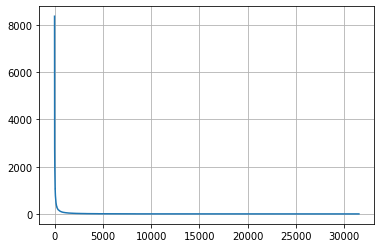

In [ ]:
# 이번에는 모델로 보자
col = 'model'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

# 이건 더 자세히 봐야 될듯.....

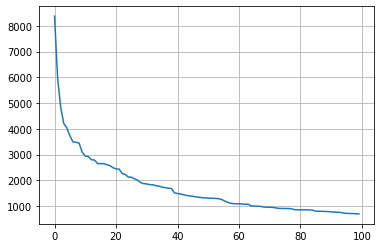

In [ ]:
plt.grid()
plt.plot(range(len(counts[:100])), counts[:100])

# 상위 10개에서 자르겠슴

In [ ]:
# 범주형 데이터를 몇개로 할 것인지 정해보자 여기서는 10개로 하자
'''
n_categorical = 10
df[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')
df[col].value_counts()
'''
# 이걸 고대로 돌리면 30000개나 되기 때문에 속도가 매우 느림

"\nn_categorical = 10\ndf[col] = df[col].apply(lambda s : s if str(s) not in counts.index[n_categorical:] else 'others')\ndf[col].value_counts()\n"

In [ ]:
#그렇기 때문에 others를 미리 만들어 놓고 돌리는게 나음
n_categorical = 10
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

others            413556
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

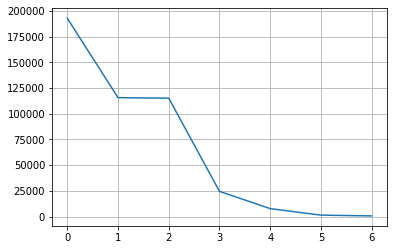

In [ ]:
# 이번에는 컨디션 차례

col = 'condition'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

good         115685
excellent    115206
others        34382
Name: condition, dtype: int64

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

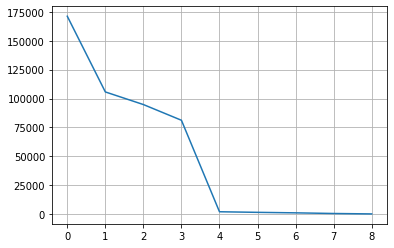

In [ ]:
# 이번에는 실린더 차례

col = 'cylinders'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
n_categorical = 4
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
others           5450
Name: cylinders, dtype: int64

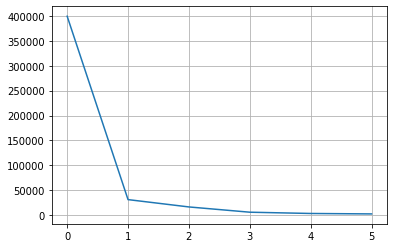

In [ ]:
# 이번에는 연료 차례

col = 'fuel'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

gas       399399
diesel     31077
others     24500
Name: fuel, dtype: int64

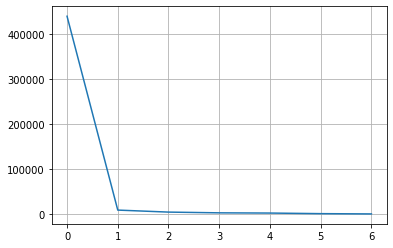

In [ ]:
# 이번에는 title_status

col = 'title_status'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
# 얘는 0에 싹 다 몰려있네 그냥 넌 날려버리겠당
df.drop('title_status', axis=1, inplace=True)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

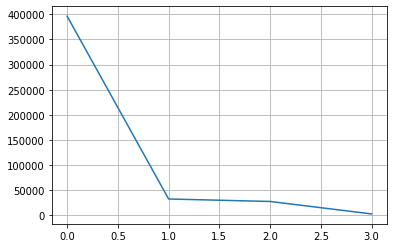

In [ ]:
# 이번에는 transmission

col = 'transmission'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
n_categorical = 3
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

automatic    396322
other         32186
manual        27263
Name: transmission, dtype: int64

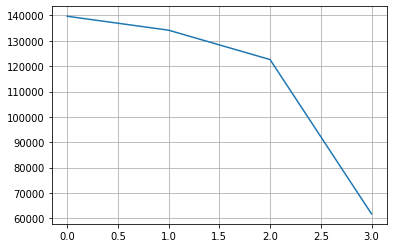

In [ ]:
# 이번에는 drive

col = 'drive'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
# 이건 그냥 고대로 써도 될듯
# 대신 others를 넣어줘야 함
df[col].fillna('others', inplace=True)

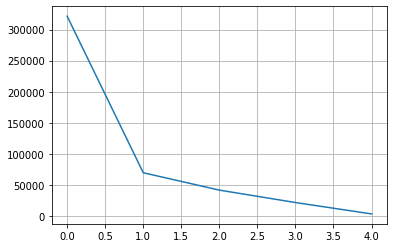

In [ ]:
# 이번에는 size

col = 'size'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
n_categorical = 2
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

full-size    69736
others       67129
Name: size, dtype: int64

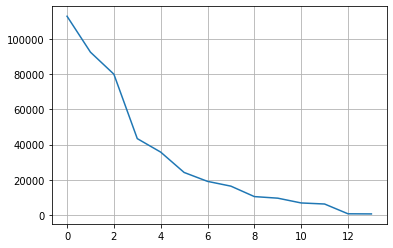

In [ ]:
# 이번에는 type

col = 'type'
counts = df[col].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [ ]:
  n_categorical = 8
others = counts.index[n_categorical:]
df[col] = df[col].apply(lambda s : s if str(s) not in others else 'others')
df[col].value_counts()

sedan        92364
SUV          79882
pickup       43343
truck        35694
others       34538
other        24160
coupe        19106
hatchback    16388
Name: type, dtype: int64

In [ ]:
# other이랑 others를 합치고 싶음
df.loc[df[col]=='other', col] = 'others'
df[col].fillna('others', inplace = True)

In [ ]:
df[col].value_counts()

others       171436
sedan         92364
SUV           79882
pickup        43343
truck         35694
coupe         19106
hatchback     16388
Name: type, dtype: int64

### 에러생긴거가같아서 여기부분부터 다시

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

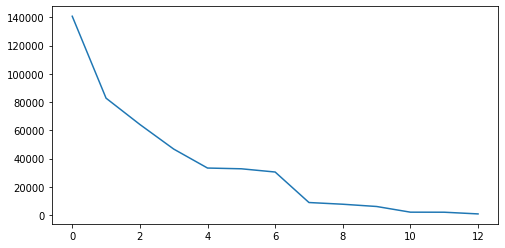

In [ ]:
plt.figure(figsize=(8,4))
col = 'paint_color'
counts = df[col].fillna('others').value_counts()
plt.plot(range(len(counts)),counts)

In [ ]:
n_cat = 7
ot = counts.index[n_cat : ]
df[col] = df[col].apply(lambda s : s if str(s) not in ot else  'others')

In [ ]:
df[col].value_counts()

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
others    27242
Name: paint_color, dtype: int64

In [ ]:
df.loc[df[col]=='other', col] = 'others'

In [ ]:
#df.drop('title_status', axis=1, inplace=True) 

In [ ]:
df[col].fillna('others', inplace =True)

### 수치형 데이터 시각화하여 분석

In [ ]:
# seaborn을 이용하여 히스토그램을 사용하지만 값의 범위가 넓을 경우 잘 작동하지 않음

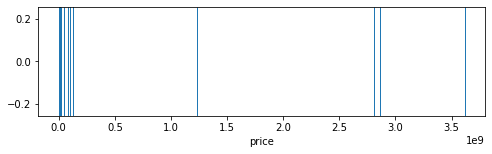

In [ ]:
# 그래도 뭐 보이는게 없다 rug plot으로 봐보자

plt.figure(figsize=(8,2))
sns.rugplot(x = 'price', data= df, height= 1)

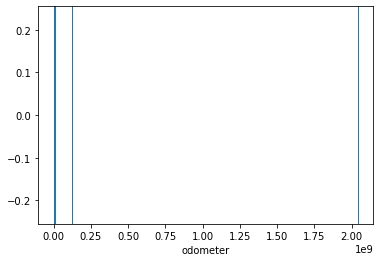

In [ ]:
sns.rugplot(x = 'odometer', data=df, height = 1)

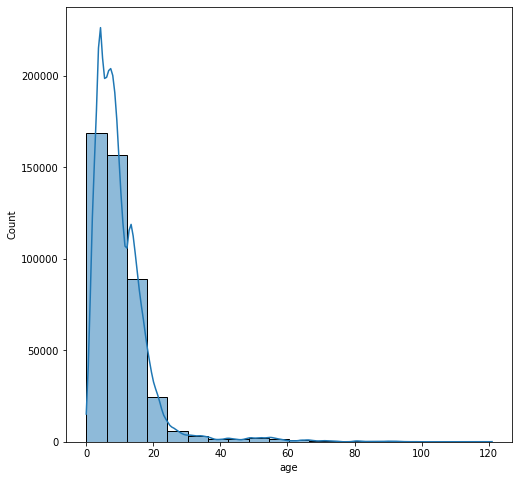

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(x = 'age', data=df, bins = 20, kde = True)

### 수치형 데이터 클리닝하기

In [ ]:
# price 의 범위체크


p1 = df['price'].quantile(0.99) # 상위 1퍼센트

p2 = df['price'].quantile(0.1) # 하위 10퍼센트
print(p1,'',p2)

59900.0  651.0


In [ ]:
# odometer의 범위 체크

o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1,'',o2)

270000.0  17553.0


In [ ]:
# 이상치를 제거할 거임
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [ ]:
df = df[(o1 > df['odometer']) & (o2<df['odometer'])]

In [ ]:
df.describe()

#보면 median이랑 mean이 비슷해짐

,price,odometer,age
count,324382.000000,324382.000000,323860.000000
mean,15314.530106,102569.319602,10.174001
std,11298.917484,55165.135400,7.076283
min,652.000000,17555.000000,0.000000
25%,6500.000000,56199.000000,5.000000
50%,12388.000000,98146.000000,9.000000
75%,21000.000000,140482.750000,13.000000
max,59895.000000,269930.000000,121.000000


In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

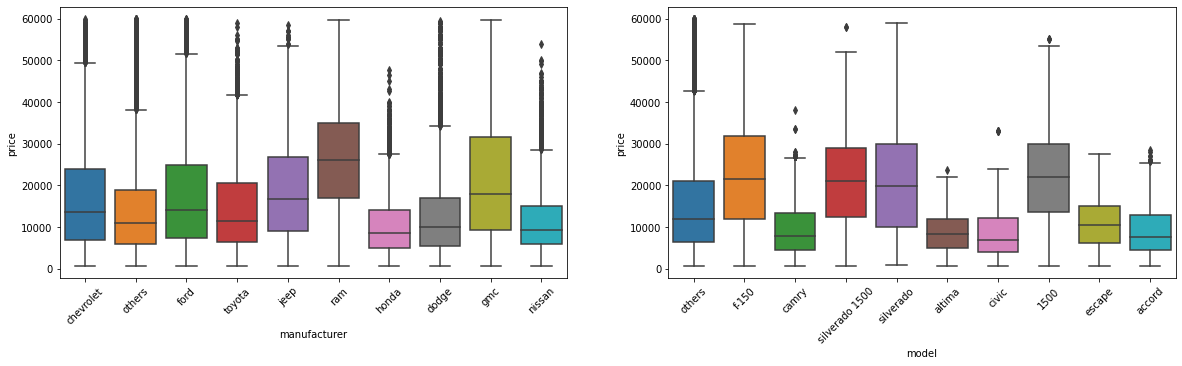

In [ ]:
#이제 못봤었던 것들을 보자
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x = 'manufacturer', y='price', data=df)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(x = 'model', y='price', data=df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 컬럼간 히트맵을 보자

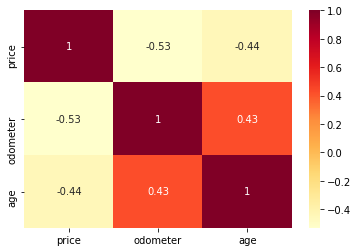

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap='YlOrRd')

### 모델 학습을 위한 데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_num = df[['odometer','age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

# 범주형 데이터는 원핫으로
X_cat = df.drop(['price', 'odometer','age'], axis = 1)
X_cat = pd.get_dummies(X_cat)

#입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis =1)
y = df['price']

In [ ]:
X.head()

,odometer,age,region_columbus,region_fayetteville,region_jacksonville,region_others,region_rochester,region_springfield,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_jeep,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_toyota,model_1500,model_accord,model_altima,model_camry,model_civic,model_escape,model_f-150,model_others,model_silverado,model_silverado 1500,condition_excellent,condition_good,condition_others,cylinders_4 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_others,transmission_automatic,transmission_manual,transmission_others,drive_4wd,drive_fwd,drive_others,size_full-size,size_others,type_SUV,type_coupe,type_hatchback,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
0,-1.265789,0.116728,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,-0.162591,-0.448541,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,-0.281398,0.681997,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.584893,5.204152,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.243464,0.823315,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
X.shape

(324382, 60)

In [ ]:
X.isna().sum()

#age가 결측이 있음

odometer                    0
age                       522
region_columbus             0
region_fayetteville         0
region_jacksonville         0
region_others               0
region_rochester            0
region_springfield          0
manufacturer_chevrolet      0
manufacturer_dodge          0
manufacturer_ford           0
manufacturer_gmc            0
manufacturer_honda          0
manufacturer_jeep           0
manufacturer_nissan         0
manufacturer_others         0
manufacturer_ram            0
manufacturer_toyota         0
model_1500                  0
model_accord                0
model_altima                0
model_camry                 0
model_civic                 0
model_escape                0
model_f-150                 0
model_others                0
model_silverado             0
model_silverado 1500        0
condition_excellent         0
condition_good              0
condition_others            0
cylinders_4 cylinders       0
cylinders_6 cylinders       0
cylinders_

In [ ]:
X['age'].mean()

2.4065666124846312e-15

In [ ]:
# age 결측을 그냥 0으로 채우자

In [ ]:
X.fillna(0.0, inplace = True)

In [ ]:
X.isna().sum()

odometer                  0
age                       0
region_columbus           0
region_fayetteville       0
region_jacksonville       0
region_others             0
region_rochester          0
region_springfield        0
manufacturer_chevrolet    0
manufacturer_dodge        0
manufacturer_ford         0
manufacturer_gmc          0
manufacturer_honda        0
manufacturer_jeep         0
manufacturer_nissan       0
manufacturer_others       0
manufacturer_ram          0
manufacturer_toyota       0
model_1500                0
model_accord              0
model_altima              0
model_camry               0
model_civic               0
model_escape              0
model_f-150               0
model_others              0
model_silverado           0
model_silverado 1500      0
condition_excellent       0
condition_good            0
condition_others          0
cylinders_4 cylinders     0
cylinders_6 cylinders     0
cylinders_8 cylinders     0
cylinders_others          0
fuel_diesel         

### 학습데이터와 테스트데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

## Regression model 학습하기

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[06:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# 모델 평가하기
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [ ]:
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(sqrt(mean_squared_error(y_test, pred)))

3771.7819860542554
5610.364414330765


## 심화분석

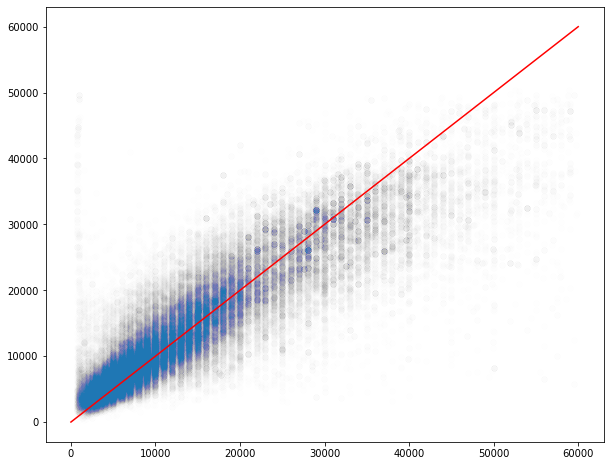

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(x = y_test, y=pred, alpha = 0.005)
plt.plot([0,60000],[0,60000],'r-')
plt.show()

#저렴한 차는 잘 예측하는 거같긴하지만 아닌 케이스도 더러있음

In [ ]:
# 에러값의 히스토그램을 확인해보자 

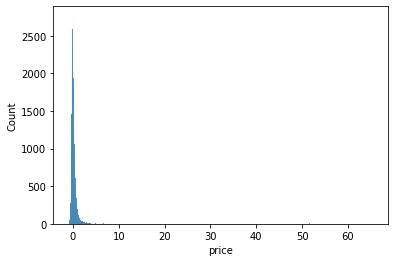

In [ ]:
err = ( pred - y_test) / y_test
sns.histplot(data=err)

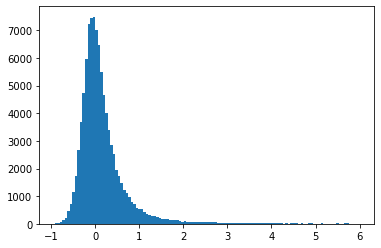

In [ ]:
plt.hist(err[err<6], bins=120)
plt.show()

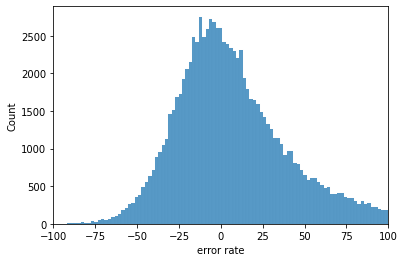

In [ ]:
err = ( pred - y_test) / y_test * 100

sns.histplot(err)
plt.xlabel('error rate')
plt.xlim(-100,100)
plt.show()